In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

In [2]:
#MNIST npy data dir, you need to edit it into your directory

train_data=np.load('E:\\code\\data\\MNIST_npy\\train_image.npy')/100
train_label=np.load('E:\\code\\data\\MNIST_npy\\train_label.npy')
test_data=np.load('E:\\code\\data\\MNIST_npy\\test_image.npy')/100
test_label=np.load('E:\\code\\data\\MNIST_npy\\test_label.npy')
train_label=to_categorical(train_label)
test_label=to_categorical(test_label)

In [3]:
#initialize parameter/functions
#softmax and derivative of softmax

w1=np.random.rand(28,28)>0.5
w2=np.zeros((784,10))

def softmax(x):
    x_exp=np.exp(x)
    return x_exp/np.sum(x_exp)

def d_softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element)*(1-exp_element/np.sum(exp_element))

In [143]:
#Reference training with only fully connected layer, print average loss
#lr2, learning rate
#*_dev : derivative for loss
#count: tracking right classification

i=0

lr2=0.001
avg_loss=0

for epoch in range(10):
    count=0
    avg_loss=0
    for i in range(60000):
        layer0=train_data[i]
        
        #layer1=np.fft.fft2(layer0)
        #layer2=np.abs(np.fft.ifft2(layer1*w1))**2
        layer2=layer0
        
        layer3=layer2.reshape(1,784)
        layer4=np.dot(layer3,w2)
        layer5=softmax(layer4)
        
        if np.argmax(train_label[i])==np.argmax(layer4):
            count+=1
        
        #backpropgation
        
        layer5_error=2*(layer5-train_label[i].reshape(1,10))*d_softmax(layer4)
        w2_dev=np.dot(layer3.reshape(784,1),layer5_error)
        w2-=w2_dev*lr2
        
        avg_loss+=np.sum((layer5-train_label[i].reshape(1,10))**2)
        
    print('train:',count/60000)
    print('avg_loss:',avg_loss/60000)

    count=0
    avg_loss=0
    for i in range(10000):
        layer0=test_data[i]
        
        #layer1=np.fft.fft2(layer0)
        #layer2=np.abs(np.fft.ifft2(layer1*w1))**2
        layer2=layer0
        
        layer3=layer2.reshape(1,784)
        layer4=np.dot(layer3,w2)
        if np.argmax(test_label[i])==np.argmax(layer4):
            count+=1
        layer5=softmax(layer4)
        avg_loss+=np.sum((layer5-test_label[i].reshape(1,10))**2)
    
    print('test:',count/10000)
    print('avg_loss:',avg_loss/10000)

train: 0.9289833333333334
avg_loss: 0.11424239482240109
test: 0.924
avg_loss: 0.11793523873419372
train: 0.92955
avg_loss: 0.11346855612786771
test: 0.924
avg_loss: 0.11758948543958647
train: 0.9297833333333333
avg_loss: 0.11272220139952663
test: 0.924
avg_loss: 0.11728252979278854
train: 0.9304
avg_loss: 0.11204050733986326
test: 0.9237
avg_loss: 0.11700736342354064
train: 0.9310333333333334
avg_loss: 0.11141458984625034
test: 0.9245
avg_loss: 0.1167589887571456
train: 0.93155
avg_loss: 0.11083665900088253
test: 0.9245
avg_loss: 0.11653348079583473
train: 0.9319
avg_loss: 0.1103003788787254
test: 0.9248
avg_loss: 0.11632786702774572
train: 0.9322166666666667
avg_loss: 0.10980056972488621
test: 0.9253
avg_loss: 0.11613986234307878
train: 0.9324666666666667
avg_loss: 0.10933294728433915
test: 0.9256
avg_loss: 0.11596765476862145
train: 0.9329166666666666
avg_loss: 0.10889392866772117
test: 0.9254
avg_loss: 0.11580975735473845


In [101]:
#Reference training with only fully connected layer, print average loss (detailed check loss)
#lr2, learning rate
#*_dev : derivative for loss
#count: tracking right classification


i=0
lr2=0.001

for epoch in range(10):
    count=0
    for i in range(60000):
        layer0=train_data[i]
        
        #layer1=np.fft.fft2(layer0)
        #layer2=np.abs(np.fft.ifft2(layer1*w1))**2
        layer2=layer0
        
        layer3=layer2.reshape(1,784)
        layer4=np.dot(layer3,w2)
        layer5=softmax(layer4)
        
        if np.argmax(train_label[i])==np.argmax(layer4):
            count+=1
    
        layer5_error=2*(layer5-train_label[i].reshape(1,10))*d_softmax(layer4)
        w2_dev=np.dot(layer3.reshape(784,1),layer5_error)
        w2-=w2_dev*lr2
        
        if i%5000==0:
            print('loss:',np.sum((layer5-train_label[i].reshape(1,10))**2))
        
    print('train:',count/60000)

    count=0
    for i in range(10000):
        layer0=test_data[i]
        
        #layer1=np.fft.fft2(layer0)
        #layer2=np.abs(np.fft.ifft2(layer1*w1))**2
        layer2=layer0
        
        layer3=layer2.reshape(1,784)
        layer4=np.dot(layer3,w2)
        if np.argmax(test_label[i])==np.argmax(layer4):
            count+=1
    print('test:',count/10000)

loss: 0.026188611186917447
loss: 0.1939781199963803
loss: 9.236994665944077e-08
loss: 0.006179196652178921
loss: 7.461641614349122e-08
loss: 0.005161612857479139
loss: 1.579190169661084e-05
loss: 8.310631632047807e-06
loss: 1.0610402248331366e-07
loss: 0.0032782721803010615
loss: 0.019654325339910225
loss: 0.0012176623307021774
train: 0.92625
test: 0.9242
loss: 0.010074023052751834
loss: 0.16924899319757222
loss: 1.5057342696479492e-07
loss: 0.006353762948172524
loss: 1.4180159846570693e-07
loss: 0.005079528630244896
loss: 2.8516279118506502e-05
loss: 1.593346260621353e-05
loss: 1.695437120031268e-07
loss: 0.004237517748211424
loss: 0.023624693378852694
loss: 0.0017849890271863717
train: 0.9275
test: 0.9245
loss: 0.00937422985043921
loss: 0.2150784376137992
loss: 2.4856775826895634e-07
loss: 0.0065493568488328964
loss: 2.1204087678224124e-07
loss: 0.005256379661247227
loss: 3.8027794214045204e-05
loss: 2.375508928932518e-05
loss: 2.493199538372195e-07
loss: 0.005069303119233265
loss: 0

In [118]:
#fully connected layer with a random FT kernel

w1=np.random.rand(28,28)>0.5

i=0
lr2=0.001

for epoch in range(10):
    count=0
    for i in range(60000):
        layer0=train_data[i]
        
        layer1=np.fft.fft2(layer0)
        layer2=np.abs(np.fft.ifft2(layer1*w1))**2

        
        layer3=layer2.reshape(1,784)
        layer4=np.dot(layer3,w2)
        layer5=softmax(layer4)
        
        if np.argmax(train_label[i])==np.argmax(layer4):
            count+=1
    
        layer5_error=2*(layer5-train_label[i].reshape(1,10))*d_softmax(layer4)
        w2_dev=np.dot(layer3.reshape(784,1),layer5_error)
        w2-=w2_dev*lr2
    print('train:',count/60000)

    count=0
    for i in range(10000):
        layer0=test_data[i]
        
        layer1=np.fft.fft2(layer0)
        layer2=np.abs(np.fft.ifft2(layer1*w1))**2

        
        layer3=layer2.reshape(1,784)
        layer4=np.dot(layer3,w2)
        if np.argmax(test_label[i])==np.argmax(layer4):
            count+=1
    print('test:',count/10000)

train: 0.7677833333333334
test: 0.8093
train: 0.8435
test: 0.8851
train: 0.8892833333333333
test: 0.8959
train: 0.8970333333333333
test: 0.8996
train: 0.9016666666666666
test: 0.9044
train: 0.90505
test: 0.9066
train: 0.9080666666666667
test: 0.9084
train: 0.9105166666666666
test: 0.9098
train: 0.9124
test: 0.9112
train: 0.91425
test: 0.9123


In [128]:
#local search for single ft kernel with FC layer
i=0
lr2=0.001

for epoch in range(10):
    count=0
    w1_upp=0
    for i in range(60000):
        layer0=train_data[i]
        layer1=np.fft.fft2(layer0)
        layer2=np.abs(np.fft.ifft2(layer1*w1))**2
        layer3=layer2.reshape(1,784)
        layer4=np.dot(layer3,w2)
        layer5=softmax(layer4)  
        layer5_error=2*(layer5-train_label[i].reshape(1,10))*d_softmax(layer4)
        w2_dev=np.dot(layer3.reshape(784,1),layer5_error)
        w2-=w2_dev*lr2        
        
        loss=np.sum((layer5-train_label[i].reshape(1,10))**2)
        
        #decide how many pixels do I need to flip.
        block=loss//0.001
        if block>784:
            block=784
            
        #avoid infinite loop
        antiloop=0
        while True:
            random_block=(np.random.rand(28,28)<(block/784))
            w1_new=np.invert(w1*random_block)*random_block+w1*np.invert(random_block)
            layer2=np.abs(np.fft.ifft2(layer1*w1_new))**2
            layer3=layer2.reshape(1,784)
            layer4=np.dot(layer3,w2)
            layer5=softmax(layer4)  
            if np.sum((layer5-train_label[i].reshape(1,10))**2)<loss:
                w1=w1_new
                #w1_upp+=1
                #if w1_upp%1000==0:
                #    print('w1 updated 1000times at ',i)
                
                break
            if antiloop>100:
                break
            antiloop+=1
        
        
        if np.argmax(train_label[i])==np.argmax(layer4):
            count+=1
        layer5_error=2*(layer5-train_label[i].reshape(1,10))*d_softmax(layer4)
        w2_dev=np.dot(layer3.reshape(784,1),layer5_error)
        w2-=w2_dev*lr2
    print('train:',count/60000)

    count=0
    for i in range(10000):
        layer0=test_data[i]
        
        layer1=np.fft.fft2(layer0)
        layer2=np.abs(np.fft.ifft2(layer1*w1))**2

        
        layer3=layer2.reshape(1,784)
        layer4=np.dot(layer3,w2)
        if np.argmax(test_label[i])==np.argmax(layer4):
            count+=1
    print('test:',count/10000)

train: 0.9216833333333333
test: 0.8641
train: 0.9246166666666666
test: 0.8915
train: 0.9248333333333333
test: 0.8837
train: 0.92605
test: 0.8816
train: 0.9260666666666667
test: 0.8723
train: 0.927
test: 0.5905
train: 0.9267666666666666
test: 0.8796
train: 0.9289333333333334
test: 0.8039
train: 0.9280833333333334
test: 0.6447
train: 0.9285166666666667
test: 0.8875


In [12]:
#local search for single ft kernel with FC layer, but the flipping pixel number depends on the average loss

i=0
lr2=0.001

w1=np.random.rand(28,28)>0.5
w2=np.zeros((784,10))

for epoch in range(10):
    count=0
    w1_upp=0
    avg_loss=0
    block=0
    
    for i in range(60000):
        layer0=train_data[i]
        layer1=np.fft.fft2(layer0)
        layer2=np.abs(np.fft.ifft2(layer1*w1))**2
        layer3=layer2.reshape(1,784)
        layer4=np.dot(layer3,w2)
        layer5=softmax(layer4)  
        layer5_error=2*(layer5-train_label[i].reshape(1,10))*d_softmax(layer4)
        w2_dev=np.dot(layer3.reshape(784,1),layer5_error)
        w2-=w2_dev*lr2        
        loss=np.sum((layer5-train_label[i].reshape(1,10))**2)
        

        
        avg_loss+=loss
        if i%1000==0:
            block=(avg_loss/1000)//0.02
            if block>784:
                block=784
            avg_loss=0
            
        antiloop=0
        while True:
            random_block=(np.random.rand(28,28)<(block/784))
            w1_new=np.invert(w1*random_block)*random_block+w1*np.invert(random_block)
            layer2=np.abs(np.fft.ifft2(layer1*w1_new))**2
            layer3=layer2.reshape(1,784)
            layer4=np.dot(layer3,w2)
            layer5=softmax(layer4)  
            if np.sum((layer5-train_label[i].reshape(1,10))**2)<loss:
                w1=w1_new
                #w1_upp+=1
                #if w1_upp%1000==0:
                #    print('w1 updated 1000times at ',i)
                
                break
            if antiloop>100:
                break
            antiloop+=1
        
        
        if np.argmax(train_label[i])==np.argmax(layer4):
            count+=1
        layer5_error=2*(layer5-train_label[i].reshape(1,10))*d_softmax(layer4)
        w2_dev=np.dot(layer3.reshape(784,1),layer5_error)
        w2-=w2_dev*lr2
    print('train:',count/60000)

    count=0
    for i in range(10000):
        layer0=test_data[i]
        
        layer1=np.fft.fft2(layer0)
        layer2=np.abs(np.fft.ifft2(layer1*w1))**2

        
        layer3=layer2.reshape(1,784)
        layer4=np.dot(layer3,w2)
        if np.argmax(test_label[i])==np.argmax(layer4):
            count+=1
    print('test:',count/10000)

train: 0.8784666666666666
test: 0.8784
train: 0.8971666666666667
test: 0.8846
train: 0.90065
test: 0.8791
train: 0.9018833333333334
test: 0.8884
train: 0.9030833333333333
test: 0.8861
train: 0.90475
test: 0.8912
train: 0.90595
test: 0.8916
train: 0.9050666666666667
test: 0.878
train: 0.9043666666666667
test: 0.8822
train: 0.9063166666666667
test: 0.8973


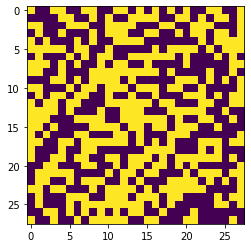

In [7]:
#the trained kernel
plt.imshow(np.fft.fftshift(w1))
plt.show()

In [129]:
#15 fixed kernels with fc layer

i=0
lr2=0.001
w1=np.random.rand(16,28,28)>0.5
w2=np.zeros((784*16,10))
layer2=np.zeros((16,28,28))

for epoch in range(10):
    count=0
    for i in range(60000):
        layer0=train_data[i]
        
        
        layer1=np.fft.fft2(layer0)
        for j in range(16):
            layer2[j]=np.abs(np.fft.ifft2(layer1*w1[j]))**2

        
        layer3=layer2.reshape(1,784*16)
        layer4=np.dot(layer3,w2)
        layer5=softmax(layer4)
        
        if np.argmax(train_label[i])==np.argmax(layer4):
            count+=1
    
        layer5_error=2*(layer5-train_label[i].reshape(1,10))*d_softmax(layer4)
        w2_dev=np.dot(layer3.reshape(784*16,1),layer5_error)
        w2-=w2_dev*lr2
    print('train:',count/60000)

    count=0
    for i in range(10000):
        layer0=test_data[i]
        
        layer1=np.fft.fft2(layer0)
        for j in range(16):
            layer2[j]=np.abs(np.fft.ifft2(layer1*w1[j]))**2

        
        layer3=layer2.reshape(1,784*16)
        layer4=np.dot(layer3,w2)
        if np.argmax(test_label[i])==np.argmax(layer4):
            count+=1
    print('test:',count/10000)

train: 0.91655
test: 0.9276
train: 0.9490333333333333
test: 0.9446
train: 0.9606
test: 0.9535
train: 0.9667833333333333
test: 0.955
train: 0.97145
test: 0.9573
train: 0.9745833333333334
test: 0.9568
train: 0.9771666666666666
test: 0.9573
train: 0.9790833333333333
test: 0.9595
train: 0.9806833333333334
test: 0.96
train: 0.9823333333333333
test: 0.9597


In [21]:
#working on the local search with 16 kernels

i=0
lr2=0.0001
w1=np.random.rand(16,28,28)>0.5
w2=np.zeros((784*16,10))
layer2=np.zeros((16,28,28))

for epoch in range(100):
    count=0
    w1_upp=0
    avg_loss=0
    
    for i in range(60000):
        layer0=train_data[i]
        layer1=np.fft.fft2(layer0)
        for k in range(16):
            layer2[k]=np.abs(np.fft.ifft2(layer1*w1[k]))**2
        layer3=layer2.reshape(1,784*16)
        layer4=np.dot(layer3,w2)
        layer5=softmax(layer4)  
        layer5_error=2*(layer5-train_label[i].reshape(1,10))*d_softmax(layer4)
        w2_dev=np.dot(layer3.reshape(784*16,1),layer5_error)
        w2-=w2_dev*lr2        
        
        loss=np.sum((layer5-train_label[i].reshape(1,10))**2)
        
        avg_loss+=loss
        if i%1000==0:
            block=(avg_loss/1000)//0.05
            if block>784:
                block=784
            avg_loss=0
        
                
            
        while True:
            random_block=(np.random.rand(16,28,28)<(block/784))
            w1_new=np.invert(w1*random_block)*random_block+w1*np.invert(random_block)
            for j in range(16):
                layer2[j]=np.abs(np.fft.ifft2(layer1*w1_new[j]))**2
            layer3=layer2.reshape(1,784*16)
            layer4=np.dot(layer3,w2)
            layer5=softmax(layer4)  
            if np.sum((layer5-train_label[i].reshape(1,10))**2)<loss:
                w1=w1_new
                #w1_upp+=1
                #if w1_upp%1000==0:
                #    print('w1 updated 1000times at ',i)
                
                break
            if antiloop>100:
                break
            antiloop+=1
        
        
        if np.argmax(train_label[i])==np.argmax(layer4):
            count+=1
        layer5_error=2*(layer5-train_label[i].reshape(1,10))*d_softmax(layer4)
        w2_dev=np.dot(layer3.reshape(784*16,1),layer5_error)
        w2-=w2_dev*lr2
    print('train:',count/60000)

    count=0
    for i in range(10000):
        layer0=test_data[i]
        
        layer1=np.fft.fft2(layer0)
        for j in range(16):
            layer2[j]=np.abs(np.fft.ifft2(layer1*w1[j]))**2

        
        layer3=layer2.reshape(1,784*16)
        layer4=np.dot(layer3,w2)
        if np.argmax(test_label[i])==np.argmax(layer4):
            count+=1
    print('test:',count/10000)

train: 0.8954333333333333
test: 0.9032
train: 0.9250666666666667
test: 0.9095
train: 0.9297166666666666
test: 0.9051
train: 0.9308833333333333
test: 0.907
train: 0.93275
test: 0.9105
train: 0.93405
test: 0.9154
train: 0.9350833333333334
test: 0.9148
train: 0.93545
test: 0.9139
train: 0.9364
test: 0.9168
train: 0.9373
test: 0.9108
train: 0.9373333333333334
test: 0.9144
train: 0.9371
test: 0.9121
train: 0.9383333333333334
test: 0.9177
train: 0.9384666666666667
test: 0.9138
train: 0.9396
test: 0.915
train: 0.9382833333333334
test: 0.911
train: 0.9393
test: 0.9127
train: 0.9394
test: 0.915
train: 0.9401833333333334
test: 0.9165
train: 0.9394
test: 0.9219
train: 0.9398833333333333
test: 0.919
train: 0.9403
test: 0.9088
train: 0.9398
test: 0.9143
train: 0.9404666666666667
test: 0.9158
train: 0.9412
test: 0.9155


C:\Users\micro\AppData\Local\Temp/ipykernel_13816/2827737255.py:6: RuntimeWarning: invalid value encountered in true_divide
  return x_exp/np.sum(x_exp)
C:\Users\micro\AppData\Local\Temp/ipykernel_13816/952683729.py:28: RuntimeWarning: invalid value encountered in double_scalars
  block=(avg_loss/1000)//0.05


train: 0.6791333333333334
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666
test: 0.098
train: 0.09871666666666666

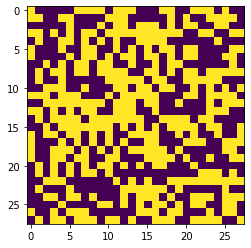

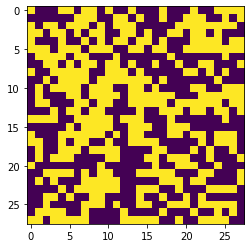

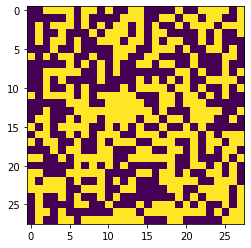

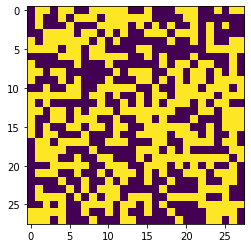

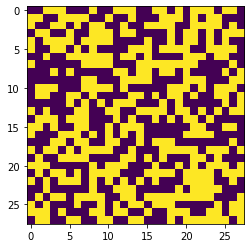

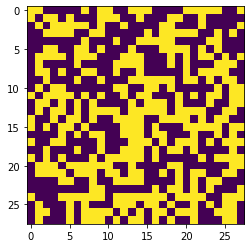

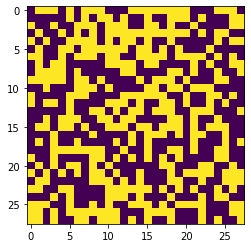

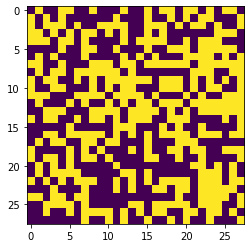

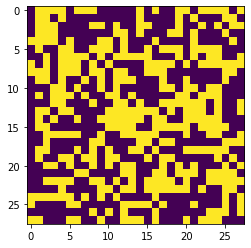

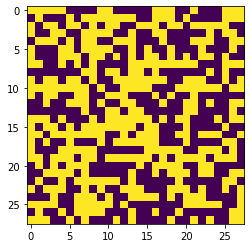

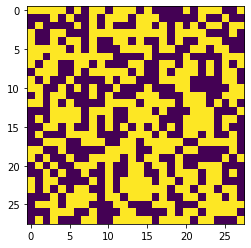

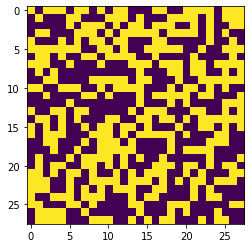

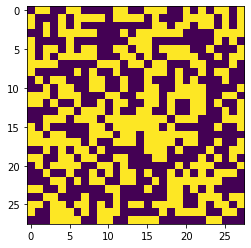

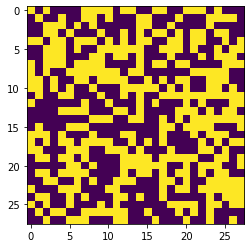

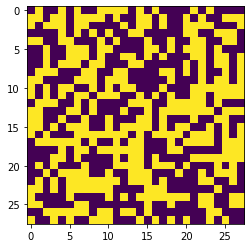

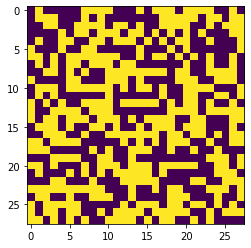

In [20]:
for i in range(16):
    plt.imshow(np.fft.fftshift(w1[i]))
    plt.show()

In [ ]:
weight_tracking=